# Coupled Oscillator

## (a) without damping

### i) Solving the system of equations

In [6]:
from sympy import symbols, Function, Eq, dsolve
from sympy.solvers.ode.systems import dsolve_system


# Define the symbols relevant to the problem
t, k, m = symbols('t k m', real=True, nonzero=True)

m = 1 #kg
k = 10 #N/m

# Define the functions we want to solve for
x1 = Function('x1')
x2 = Function('x2')
fncs = [x1(t), x2(t)]


# Set up the set of differential equations
eqn1 = Eq(x1(t).diff(t,2) + (k/m) * (2 * x1(t) - x2(t)), 0)
eqn2 = Eq(x2(t).diff(t,2) + (k/m) * (-x1(t) + 2 * x2(t)), 0)
# display(eqn1, eqn2)
eqns = [eqn1, eqn2]

# Define the initial conditions
ics={
    x1(t).subs(t,0): 0.1, 
    x2(t).subs(t,0):-0.1,
    x1(t).diff(t,1).subs(t,0):0,
    x2(t).diff(t,1).subs(t,0):0
    }

# Determine the solutions to the system of ODEs
general_sol = dsolve_system(eqns, fncs, t)
special_sol = dsolve_system(eqns, fncs, t, ics)
# Unpack the list
special_sol_1 = special_sol[0][0]
special_sol_2 = special_sol[0][1]

# Display the solutions
# display(general_sol[0][0], general_sol[0][1])
display(special_sol_1, special_sol_2)

Eq(x1(t), 0.1*cos(5.47722557505166*t))

Eq(x2(t), -0.1*cos(5.47722557505166*t))

#### ii) Plotting the solution on an Amplitude vs. Time plot

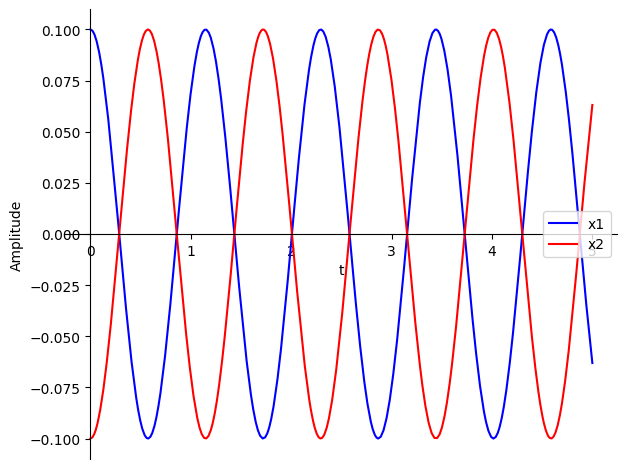

In [8]:
# %pip install matplotlib
from sympy import plot

# Refining the function to plot on the y-axis
special_sol_1_plot = special_sol[0][0].rhs
special_sol_2_plot = special_sol[0][1].rhs

# Plotting with sympy's plot
p=plot(special_sol_1_plot, special_sol_2_plot, (t,0,5), show=False, legend=True)
p.xlabel='t'
p.ylabel='Amplitude'
p[0].line_color='blue'
p[0].label='x1'
p[1].line_color='red'
p[1].label='x2'
p.show()

#### iii) Converting a linear system of ODEs to a single matrix ODE and solving the matrix equation
Note: for $\text{order}=2$, the method 'linear_ode_to_matrix' represents the linear systems in matrix form as,

\begin{equation}
    A_2 \ddot{X} = A_1 \dot{X} + A_0 X + b
\end{equation}    
where $A_2, A_1$ and $A_0$ are $2 \text{x}2$ matrices and $\ddot{X}, \dot{X}, X$ and $b$ are $2\text{x} 1$ matrices with $X=[x_1,x_2]^T$.

In [9]:
from sympy import Matrix
from sympy.solvers.ode.systems import linear_ode_to_matrix


# The 'linear_ode_to_matrix' requires 'eqns': the set of equations to solve, fncs: the dependent variables, t: the independent variable and the order
order=2
(A2, A1, A0), b = linear_ode_to_matrix(eqns, fncs, t, order)


# Create a matrix with sympy to define the matrix equation
X = Matrix(fncs)


# Set up the matrix equation
LHS = A2 * X.diff(t, 2)
RHS = A1 * X.diff(t) + A0 * X + b
# Define the matrix equation by LHS-RHS=0 in order to keep the matrix equation in the same class.
matrix_eqn = LHS - RHS
# display(matrix_eqn)

# Solve the matrix equation for the independent variables [x1(t), x2(t)]
special_matrix_sol = dsolve(eq=matrix_eqn, fncs=fncs, ics=ics)
# Unpack the list
special_matrix_sol_1 = special_matrix_sol[0]
special_matrix_sol_2 = special_matrix_sol[1]

# Display the solutions
display(special_matrix_sol_1, special_matrix_sol_2)

Eq(x1(t), 0.1*cos(5.47722557505166*t))

Eq(x2(t), -0.1*cos(5.47722557505166*t))

which is coherent with the result we got above with 'dsolve_system'.

## (b) with damping

In [2]:
from sympy import symbols, Function, Eq, dsolve, plot, N, Matrix
from sympy.solvers.ode.systems import dsolve_system
from sympy.solvers.ode.systems import linear_ode_to_matrix


# Define the symbols relevant to the problem
t, m1, m2, k1, k2, k3, d1, d2 = symbols('t m1 m2 k1 k2 k3 d1 d2', nonzero=True)

# Define the functions we want to solve for
x1 = Function("x1")
x2 = Function("x2")
fncs = [x1(t), x2(t)]

m1, m2 = 1, 1
k1, k2, k3 = 10, 10, 10    
d1, d2 = 0.1, 0.1 


# Set up the differential ODEs system
eqn1_damp = Eq(m1*x1(t).diff(t,2) + d1*x1(t).diff(t,1) + k1*x1(t) - k2*(x2(t)-x1(t)),0) 
eqn2_damp = Eq(m2*x2(t).diff(t,2) + d2*x2(t).diff(t,1) + k2*(x2(t)-x1(t))+k3*x2(t),0)
# display(eqn1_damp, eqn2_damp)
eqns_damp = [eqn1_damp, eqn2_damp]

ics_damp={
    x1(t).subs(t,0): 0.1, 
    x2(t).subs(t,0):-0.1,
    x1(t).diff(t,1).subs(t,0):0,
    x2(t).diff(t,1).subs(t,0):0
    }

# Convert system of ODEs to matrix equation as in a)
X = Matrix(fncs)
order=2
(A2_damp, A1_damp, A0_damp), b_damp = linear_ode_to_matrix(eqns_damp, fncs, t, order)

RHS_damp = A2_damp * X.diff(t,2) 
LHS_damp = A1_damp * X.diff(t,1) + A0_damp * X + b_damp

matrix_eqn_damp = RHS_damp - LHS_damp


# Solve the matrix equation for the independent variables [x1(t), x2(t)]
special_sol_damp = dsolve(eq=matrix_eqn_damp, fncs=fncs, ics=ics_damp)
# Unpack the list
special_sol_damp_1 = special_sol_damp[0]
special_sol_damp_2 = special_sol_damp[1]

# Display the solutions
display(special_sol_damp_1, special_sol_damp_2)

Eq(x1(t), 0.000912908967841426*exp(-0.05*t)*sin(5.47699735256463*t) + 0.1*exp(-0.05*t)*cos(5.47699735256463*t))

Eq(x2(t), -0.000912908967841426*exp(-0.05*t)*sin(5.47699735256463*t) - 0.1*exp(-0.05*t)*cos(5.47699735256463*t))

#### Plotting the solution on an Amplitude vs. Time plot

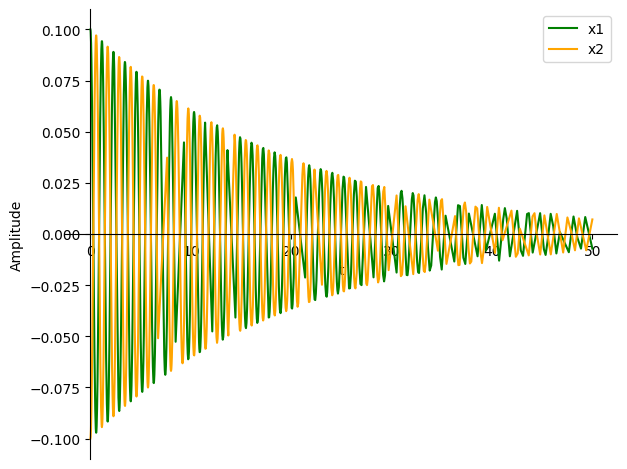

In [3]:
# %pip install matplotlib
from sympy import plot, plot_parametric,sin,cos,log, sqrt, exp
from sympy import *

# Refining the function to plot on the y-axis
special_sol_1_damp_plot = special_sol_damp[0].rhs
special_sol_2_damp_plot = special_sol_damp[1].rhs
special_sol_2_damp_plot


# Plotting with sympy's plot
p=plot(special_sol_1_damp_plot, special_sol_2_damp_plot, (t,0,50), show=False, legend=True)
p.xlabel='t'
p.ylabel='Amplitude'
p[0].line_color='green'
p[0].label='x1'
p[1].line_color='orange'
p[1].label='x2'
p.show()